In [1]:
from pathlib import Path
import numpy as np
import pandas as pd

from rdkit import Chem
from rdkit.Chem.Descriptors import ExactMolWt,MolWt
from retrorules_gdr_2021.rule_burner import RuleBurner
from retrorules_gdr_2021.data import ExperimentalData, RuleData,ResultMatcher
from retrorules_gdr_2021.frag import Fragmenter
from retrorules_gdr_2021.workflow import Workflow

%load_ext autoreload
%autoreload 2

In [2]:
#rules_path = "/home/yann/Data/RetroRules/retrorules_rr02_rp3_hs/retrorules_rr02_flat_all.tsv"
#rb = RuleBurner(rules_path=rules_path)

mgf_path = "/home/yann/Cloud/Pro/Projets/MetWork/Data/Sideritis/mgf_réseau_7fractions_Irlande.mgf"
exp_data = ExperimentalData(mgf_path)

In [15]:
previous_smiles=[
    "[H]C1(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C(O)=C2)OC(COC(C)=O)C(O)C(O)C1O",
    "CC(=O)OCC1OC(OC2C(O)C(O)C(CO)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C=C2)C(O)C(O)C1O",
    "CC(=O)OCC1OC(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(O)C(O)=C2)C(O)C(O)C1O",
    "[H]C1(OC2C(O)C(O)C(COC(C)=O)OC2OC2=C(O)C3=C(C(O)=C2)C(=O)C=C(O3)C2=CC=C(OC)C=C2)OC(COC(C)=O)C(O)C(O)C1O",
]
    
input_smiles = [

    "OCC1OC(Oc2cc(O)c3c(oc(cc3=O)-c3ccc(O)cc3)c2O)C(O)C(O)C1O",
    "OCC1OC(OC2C(O)C(O)C(CO)OC2Oc2cc(O)c3c(oc(cc3=O)-c3ccc(O)cc3)c2O)C(O)C(O)C1O",
    "COc1ccc(cc1)-c1cc(=O)c2c(O)cc(OC3OC(CO)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
    "COc1ccc(cc1O)-c1cc(=O)c2c(O)cc(OC3OC(CO)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
    "COc1ccc(cc1O)-c1cc(=O)c2c(O)cc(OC3OC(CO)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
    "COc1ccc(cc1O)-c1cc(=O)c2c(O)cc(OC3OC(COC(C)=O)C(O)C(O)C3OC3OC(COC(C)=O)C(O)C(O)C3O)c(O)c2o1",
    "[H]OC(=O)C([H])(O[H])C([H])([H])OP(=O)(O[H])O[H]",
]

previous_scan = ["175","168","191","190"]

input_scans =[
    "115",
    "152",
    "173",
    "182",
    "186",
    "194",
    "6",
]

In [42]:
wf = Workflow(
    input_smiles=[*previous_smiles, *input_smiles],
    input_scans=[*previous_scan, *input_scans],
    data_path="data/sideritis-step1and2-all-{diameter}.csv",
    exp_data=exp_data,
    cosine_threshold=0.2)
wf.compute(8,12)


### compute for diameter 8

load rules
self.max_workers 8



KeyboardInterrupt



In [38]:
wf.ms2_match

product_inchikeys  \
8    WDWBIQRRBRJRGX-UHFFFAOYSA-N   
83   COXYSPMDNFWJDB-UHFFFAOYSA-N   
285  WIXQDVAMLAUENY-UHFFFAOYSA-N   
420  DKQAJCFPXOZRCA-UHFFFAOYSA-N   

                                        product_smiles scans    cosine  
8    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   156  0.478705  
83   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   156  0.469132  
285  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   156  0.484148  
420  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   156  0.482620

In [39]:
list(wf.ms2_match.product_smiles)

['[H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C2([H])OC2([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C2([H])O[H])c([H])c(O[H])c2c(=O)c([H])c(-c3c([H])c([H])c(OC([H])([H])[H])c([H])c3[H])oc12',
 '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(OC([H])([H])[H])c3c(=O)c2[H])c([H])c1[H]',
 '[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1C([H])([H])[H]',
 '[H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1[H]']

In [40]:
rule_data = wf.rule_data.data.reset_index()
rule_data.query("product_inchikeys == 'WDWBIQRRBRJRGX-UHFFFAOYSA-N'")


index rule_id substrate_id  \
233       81   10590            5   
483      144   10920            5   
491      149   10924            5   
552      177   10958            5   
1510     545   11839            6   
...      ...     ...          ...   
36720  10670    9023            5   
36954  10729    9268            5   
37774  10868    9697            5   
38005  10953    9880            5   
38277  11059    9912            5   

                                           product_list  \
233    <rdkit.Chem.rdchem.Mol object at 0x7fd318c5e090>   
483    <rdkit.Chem.rdchem.Mol object at 0x7fd318c67c70>   
491    <rdkit.Chem.rdchem.Mol object at 0x7fd31a766540>   
552    <rdkit.Chem.rdchem.Mol object at 0x7fd318a2ba90>   
1510   <rdkit.Chem.rdchem.Mol object at 0x7fd318c4edb0>   
...                                                 ...   
36720  <rdkit.Chem.rdchem.Mol object at 0x7fd312df1130>   
36954  <rdkit.Chem.rdchem.Mol object at 0x7fd313644270>   
37774  <rdkit.Chem.rdchem.Mol object at 0x7fd312eff450>   
38005  <rdkit.Chem.rdchem.Mol object at 0x7fd312f8ef90>   
38277  <rdkit.Chem.rdchem.Mol object at 0x7fd3138b34f0>   

                 product_inchikeys  \
233    WDWBIQRRBRJRGX-UHFFFAOYSA-N   
483    WDWBIQRRBRJRGX-UHFFFAOYSA-N   
491    WDWBIQRRBRJRGX-UHFFFAOYSA-N   
552    WDWBIQRRBRJRGX-UHFFFAOYSA-N   
1510   WDWBIQRRBRJRGX-UHFFFAOYSA-N   
...                            ...   
36720  WDWBIQRRBRJRGX-UHFFFAOYSA-N   
36954  WDWBIQRRBRJRGX-UHFFFAOYSA-N   
37774  WDWBIQRRBRJRGX-UHFFFAOYSA-N   
38005  WDWBIQRRBRJRGX-UHFFFAOYSA-N   
38277  WDWBIQRRBRJRGX-UHFFFAOYSA-N   

                                          product_inchis  \
233    InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
483    InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
491    InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
552    InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
1510   InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
...                                                  ...   
36720  InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
36954  InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
37774  InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
38005  InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   
38277  InChI=1S/C28H32O16/c1-39-11-4-2-10(3-5-11)14-6...   

                                          product_smiles product_masses  
233    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
483    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
491    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
552    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
1510   [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
...                                                  ...            ...  
36720  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
36954  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
37774  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
38005  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  
38277  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...     624.169035  

[74 rows x 8 columns]

In [26]:
rules_path = "/home/yann/Data/RetroRules/retrorules_rr02_rp3_hs/retrorules_rr02_flat_all.tsv"
rules_df_raw = pd.read_csv(rules_path, sep="\t")

In [43]:
rules_df = rules_df_raw.query(
                f"Diameter == {6} and ~Reaction_EC_number.isnull()"
            )
rule = rules_df.iloc[10920]
print(rule.Reaction_EC_number)
print(rule.Rule_SMILES)
print(rule)

2.1.1.212,2.1.1.46
[O](-[c](:[c](-[H]):[c]):[c](-[H]):[c])-[H]>>[C](-[O]-[c](:[c](-[H]):[c]):[c](-[H]):[c])(-[H])(-[H])-[H].[H+]
# Rule_ID                                        RR-02-612399e10c8f7dfb-06-F
Legacy_ID                                                MNXR111315_MNXM1355
Reaction_ID                                                       MNXR111315
Diameter                                                                   6
Rule_order                                                                 1
Rule_SMARTS                ([#8&v2:1](-[#6&v4:2](:[#6&v4:3](-[#1&v1:4]):[...
Substrate_ID                                                        MNXM1355
Substrate_SMILES           [H][O][c]1[c]([H])[c]([H])[c]([C]2([H])[C](=[O...
Product_IDs                                                 MNXM1.MNXM162795
Product_SMILES             [H+].[H][O][c]1[c]([H])[c]([H])[c]2[c]([c]1[H]...
Rule_SMILES                [O](-[c](:[c](-[H]):[c]):[c](-[H]):[c])-[H]>>[...
Rule_SMARTS_lite        

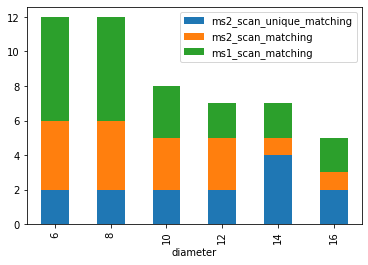

In [85]:
wf.plot_scans()

In [82]:
wf.ms2_match.sort_values("scans").iloc[3].product_smiles

'[H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c([H])c1OC([H])([H])[H]'

In [75]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
0   PTKNECMMKRDZEG-UHFFFAOYSA-N   
3   IKSMYAFBURMXFU-UHFFFAOYSA-N   
10  NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
8   ZOIVTTBRLWZSAT-UHFFFAOYSA-N   
11  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
9   AXVCPTNYJJWIRE-UHFFFAOYSA-N   

                                       product_smiles scans    cosine  
0   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
3   [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
10  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
8   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.457157  
11  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185  
9   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.477215

In [77]:
wf.ms2_match.sort_values("scans").iloc[5].product_smiles

'[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])OC4([H])OC([H])(C([H])([H])OC(=O)C([H])([H])[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1OC([H])([H])[H]'

In [69]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
0  PTKNECMMKRDZEG-UHFFFAOYSA-N   
3  IKSMYAFBURMXFU-UHFFFAOYSA-N   
8  NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
9  PWOFHOJJMWJGLT-UHFFFAOYSA-N   

                                      product_smiles scans    cosine  
0  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
3  [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
8  [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
9  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185

In [88]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
4    LKPJBEBGOBIWTE-UHFFFAOYSA-N   
52   PTKNECMMKRDZEG-UHFFFAOYSA-N   
2    NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
108  RWMIRBPJISMLLD-UHFFFAOYSA-N   
55   IKSMYAFBURMXFU-UHFFFAOYSA-N   
34   RYYYVEJWVWQESE-UHFFFAOYSA-N   
175  PWSXATCNKVDHPH-UHFFFAOYSA-N   
107  OVUXFMYOTONXPD-UHFFFAOYSA-N   
180  NQXINWYGFOWGKZ-UHFFFAOYSA-N   
9    ZOIVTTBRLWZSAT-UHFFFAOYSA-N   
7    LORXOTCKKVEWGS-UHFFFAOYSA-N   
33   FASLAPZDOQUPQJ-UHFFFAOYSA-N   
174  HMYWLBFMSXYWNB-UHFFFAOYSA-N   
3    PWOFHOJJMWJGLT-UHFFFAOYSA-N   
179  NAIKORBIYNIXRX-UHFFFAOYSA-N   
10   AXVCPTNYJJWIRE-UHFFFAOYSA-N   
8    ZXQCHXLLIKMUTB-UHFFFAOYSA-N   
109  BARFRJQQWUNYDT-UHFFFAOYSA-N   
176  KMBIZIOMXIYABQ-UHFFFAOYSA-N   
35   CZTCJENOVUYVFY-UHFFFAOYSA-N   

                                        product_smiles scans    cosine  
4    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   115  0.519263  
52   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
2    [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
108  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   173  0.468085  
55   [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
34   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   173  0.457909  
175  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.469308  
107  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   182  0.459614  
180  [H]Oc1c(-c2c([H])c([H])c(OC([H])([H])[H])c([H]...   182  0.465155  
9    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.457157  
7    [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   182  0.455458  
33   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.452734  
174  [H]Oc1c([H])c([H])c([H])c(-c2oc3c(O[H])c(OC4([...   186  0.516028  
3    [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185  
179  [H]Oc1c(-c2c([H])c([H])c(OC([H])([H])[H])c([H]...   194  0.483654  
10   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.477215  
8    [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   194  0.476499  
109  [H]Oc1c([H])c([H])c(-c2oc3c(OC([H])([H])[H])c(...   194  0.482463  
176  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.484907  
35   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.479761

In [89]:
wf.ms2_match.sort_values("scans").iloc[0].product_smiles

'[H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C([H])([H])O[H])C([H])(O[H])C([H])(O[H])C4([H])O[H])c([H])c(O[H])c3c(=O)c2[H])c([H])c1[H]'

In [131]:
wf.compute(6,12)


### compute for diameter 6

rule_results : 15065
total_structures : 1022
ms1_matching : 52
ms1_scan_matching : 12
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadat

No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No com

In [132]:
wf.ms2_match.sort_values("scans")

product_inchikeys  \
0   PTKNECMMKRDZEG-UHFFFAOYSA-N   
3   NXDNDRJNQJPXGJ-UHFFFAOYSA-N   
4   IKSMYAFBURMXFU-UHFFFAOYSA-N   
24  LORXOTCKKVEWGS-UHFFFAOYSA-N   
30  ZOIVTTBRLWZSAT-UHFFFAOYSA-N   
5   PWOFHOJJMWJGLT-UHFFFAOYSA-N   
25  ZXQCHXLLIKMUTB-UHFFFAOYSA-N   
31  AXVCPTNYJJWIRE-UHFFFAOYSA-N   

                                       product_smiles scans    cosine  
0   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   152  0.494846  
3   [H]Oc1c(OC2([H])OC([H])(C([H])([H])O[H])C([H])...   173  0.466331  
4   [H]Oc1c(OC2([H])OC([H])(C([H])([H])OC(=O)C([H]...   173  0.456368  
24  [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   182  0.455458  
30  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   182  0.457157  
5   [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   186  0.499185  
25  [H]Oc1c([H])c(-c2oc3c(O[H])c(OC4([H])OC([H])(C...   194  0.476499  
31  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...   194  0.477215

In [141]:
product_inchikeys = wf.ms2_match.query("scans == '186'").product_inchikeys

In [142]:
rule_data = wf.rule_data.data.reset_index()

rule_data[rule_data.product_inchikeys.isin(product_inchikeys)]

index  Unnamed: 0  rule_id  substrate_id  \
124    126          61    16319             1   
138    142          67    16322             1   
141    146          69    16324             1   
155    162          75    16327             1   
315    323         153    19753             3   
319    327         155    19755             3   
496    506         243     2522             1   
515    525         252    29657             3   
567    577         278    31092             3   
666    677         328     9659             2   
717    729         353     9913             3   

                                         product_list  \
124  <rdkit.Chem.rdchem.Mol object at 0x7f579a1ae360>   
138  <rdkit.Chem.rdchem.Mol object at 0x7f57a3c0f680>   
141  <rdkit.Chem.rdchem.Mol object at 0x7f57a94259f0>   
155  <rdkit.Chem.rdchem.Mol object at 0x7f5799d57e00>   
315  <rdkit.Chem.rdchem.Mol object at 0x7f57a38c18b0>   
319  <rdkit.Chem.rdchem.Mol object at 0x7f57a3c16db0>   
496  <rdkit.Chem.rdchem.Mol object at 0x7f57a3c42f90>   
515  <rdkit.Chem.rdchem.Mol object at 0x7f5799e2bdb0>   
567  <rdkit.Chem.rdchem.Mol object at 0x7f57a934e900>   
666  <rdkit.Chem.rdchem.Mol object at 0x7f57a39bec70>   
717  <rdkit.Chem.rdchem.Mol object at 0x7f579a124ef0>   

               product_inchikeys  \
124  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
138  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
141  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
155  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
315  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
319  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
496  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
515  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
567  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
666  PWOFHOJJMWJGLT-UHFFFAOYSA-N   
717  PWOFHOJJMWJGLT-UHFFFAOYSA-N   

                                        product_inchis  \
124  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
138  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
141  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
155  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
315  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
319  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
496  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
515  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
567  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
666  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   
717  InChI=1S/C31H34O18/c1-11(32)43-9-19-22(37)25(4...   

                                        product_smiles  product_masses  
124  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
138  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
141  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
155  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
315  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
319  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
496  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
515  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
567  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
666  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514  
717  [H]Oc1c([H])c([H])c(-c2oc3c(O[H])c(OC4([H])OC(...      694.174514

In [126]:
rules_df_raw = pd.read_csv(rules_path, sep="\t")

In [146]:
rules_df = rules_df_raw.query(
                f"Diameter == {14} and ~Reaction_EC_number.isnull()"
            )
rule = rules_df.iloc[16324]
print(rule.Reaction_EC_number)
print(rule.Rule_SMILES)
print(rule)

3.1.1.6
[C]-[C](-[O]-[C]1(-[H])-[O]-[C](-[C](-[O]-[H])(-[H])-[H])(-[H])-[C](-[O]-[H])(-[H])-[C](-[O]-[H])(-[H])-[C]-1(-[O]-[H])-[H])(-[H])-[C]>>[C]-[C](-[O]-[C]1(-[H])-[O]-[C](-[C](-[O]-[C](-[C](-[H])(-[H])-[H])=[O])(-[H])-[H])(-[H])-[C](-[O]-[H])(-[H])-[C](-[O]-[H])(-[H])-[C]-1(-[O]-[H])-[H])(-[H])-[C].[O](-[H])-[H]
# Rule_ID                                        RR-02-038cb0ec7bb086d0-14-F
Legacy_ID                                                MNXR115838_MNXM8020
Reaction_ID                                                       MNXR115838
Diameter                                                                  14
Rule_order                                                                 1
Rule_SMARTS                ([#6&v4:1]-[#6&v4:2](-[#8&v2:3]-[#6&v4:4]1(-[#...
Substrate_ID                                                        MNXM8020
Substrate_SMILES           [H][O][C](=[O])[C]([H])([H])[C]([H])([H])[C]([...
Product_IDs                                                   MNX

In [4]:
input_inchikeys = [
    Chem.MolToInchiKey(Chem.MolFromSmiles(smiles)) 
    for smiles in input_smiles
]
masses = [
    ExactMolWt(Chem.MolFromSmiles(smiles)) 
    for smiles in input_smiles
]
input_data = pd.DataFrame({"scans": scans, "product_smiles": input_smiles, "product_inchikeys": input_inchikeys, "product_masses": masses})
Fragmenter(input_data).gen_all_frag()

class InputData:
    def __init__(self, input_data):
        self.data = input_data
matcher = ResultMatcher(InputData(input_data), exp_data)
matcher.add_cosine()
cosine_threshold = matcher.match_data[matcher.match_data.scans.isin(scans)].cosine.mean()*0.8
print("cosine_threshold : ", cosine_threshold)

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()



(pid=12578) HLGKHCVGTSTFAJ-UHFFFAOYSA-N already fraged
(pid=12578) WINFSIMEBFWGGD-UHFFFAOYSA-N already fraged
(pid=12578) FTPMODVTXJGVCJ-UHFFFAOYSA-N already fraged
(pid=12578) IQDPCQNHHMHGJX-UHFFFAOYSA-N already fraged
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.
No compound name found in metadata.
No precursor_mz found in metadata.

In [55]:
# columns = ["diameter", *list(scores.columns)[3:]]

def plot_columns(columns, **kwargs):
    columns.reverse()
    df = scores.loc[:, columns]
    display(df)
    df_plot = df.diff(axis=1)
    df_plot[columns[0]] = df[columns[0]]
    df_plot.diameter = df.diameter
    df_plot.plot.bar(x="diameter", stacked=True, **kwargs)